# Descriptive Analytics

## 1. Summary statistics

In [168]:
import pandas as pd
import numpy as np
from scipy import stats

In [190]:
df=pd.read_csv('cleaned_merged_data.csv')
# Function to calculate mean, median, mode, and standard deviation

In [194]:
# Function to calculate mean, median, mode, and standard deviation
def calculate_statistics(df, group_by_col, target_col):
    grouped = df.groupby(group_by_col)[target_col]
    summary = pd.DataFrame({
        'Mean': grouped.mean(),
        'Median': grouped.median(),
        'Mode': grouped.apply(lambda x: stats.mode(x, keepdims=True)[0][0]),
        'Std Dev': grouped.std()
    })
    return summary

# Calculate statistics for 'production_countries','year','genre'and 'type' grouped by 'rating'
production_countries_stats = calculate_statistics(df, 'production_countries', 'rating')
year_stats = calculate_statistics(df, 'year', 'rating')
genre_stats = calculate_statistics(df, 'genre', 'rating')
type_stats = calculate_statistics(df, 'type', 'rating')

# Output the results
print("Production Countries Statistics:")
print(production_countries_stats)

print("\nYear Statistics:")
print(year_stats)

print("\nGenre Statistics:")
print(genre_stats)

print("\nType Statistics:")
print(type_stats)

Production Countries Statistics:
                          Mean  Median  Mode   Std Dev
production_countries                                  
AE                    5.464286    5.55   5.0  1.535532
AE, EG, RO, SA        4.600000    4.60   4.6       NaN
AE, LB                5.700000    5.70   5.7       NaN
AE, US                6.600000    6.60   6.6       NaN
AO, ZA                4.800000    4.80   4.8       NaN
...                        ...     ...   ...       ...
ZA, IE                7.200000    7.20   7.2       NaN
ZA, RW, GB            6.500000    6.50   6.5       NaN
ZA, US                6.100000    6.10   6.1       NaN
ZA, US, DE            6.600000    6.60   6.6       NaN
ZW                    5.900000    5.90   5.9       NaN

[432 rows x 4 columns]

Year Statistics:
          Mean    Median      Mode   Std Dev
year                                        
0     6.764515  6.764515  6.764515  0.000000
1932  6.500000  6.500000  5.300000  1.697056
1933  5.700000  5.700000  5.70

In [198]:
# Function to generate frequency distributions
def generate_frequency_distribution(df, column):
    frequency_distribution = df[column].value_counts()
    percentage_distribution = df[column].value_counts(normalize=True) * 100
    return pd.DataFrame({
        'Frequency': frequency_distribution,
        'Percentage': percentage_distribution
    })

In [199]:
# Generate frequency distributions for relevant categorical columns
columns_to_analyze = ['year', 'genre', 'type', 'production_countries']
for col in columns_to_analyze:
    print(f"Frequency Distribution for {col}:")
    print(generate_frequency_distribution(df, col))
    print("\n")

Frequency Distribution for year:
      Frequency  Percentage
2022       1146    9.617321
2018       1125    9.441088
2020       1116    9.365559
2021       1111    9.323599
2019       1104    9.264854
...         ...         ...
1935          1    0.008392
1934          1    0.008392
2025          1    0.008392
1947          1    0.008392
1940          1    0.008392

[88 rows x 2 columns]


Frequency Distribution for genre:
                                          Frequency  Percentage
Comedy                                         1023    8.626360
Drama                                           765    6.450797
Documentary                                     459    3.870478
Unknown                                         413    3.482587
Documentation                                   332    2.799562
...                                             ...         ...
Action, Comedy, Thriller, Drama, Romance          1    0.008432
Comedy, Drama, Music, History                     1    0.008

## 2. Data Visualization

In [200]:
import matplotlib.pyplot as plt
import seaborn as sns

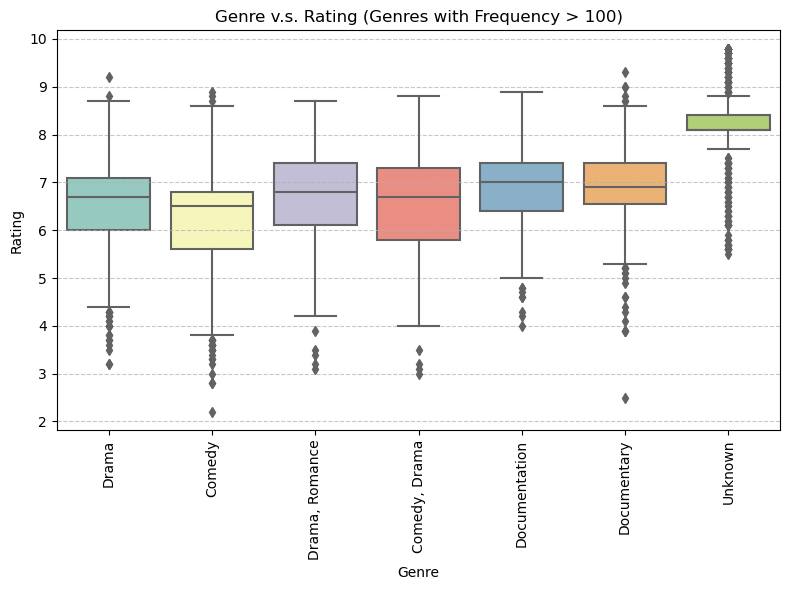

In [201]:
# Ensure 'genre' and 'rating' columns exist (replace with correct column names if needed)
if 'genre' in df.columns and 'rating' in df.columns:
    # Count the frequency of each genre
    genre_counts = df['genre'].value_counts()

    # Filter genres with frequency > 100
    filtered_genres = genre_counts[genre_counts > 200].index

    # Filter the dataset to only include these genres
    df_filtered = df[df['genre'].isin(filtered_genres)]

    # Plot a boxplot to visualize the relationship
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df_filtered, x='genre', y='rating', palette='Set3')
    plt.title('Genre v.s. Rating (Genres with Frequency > 100)')
    plt.xlabel('Genre')
    plt.ylabel('Rating')
    plt.xticks(rotation=90, fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

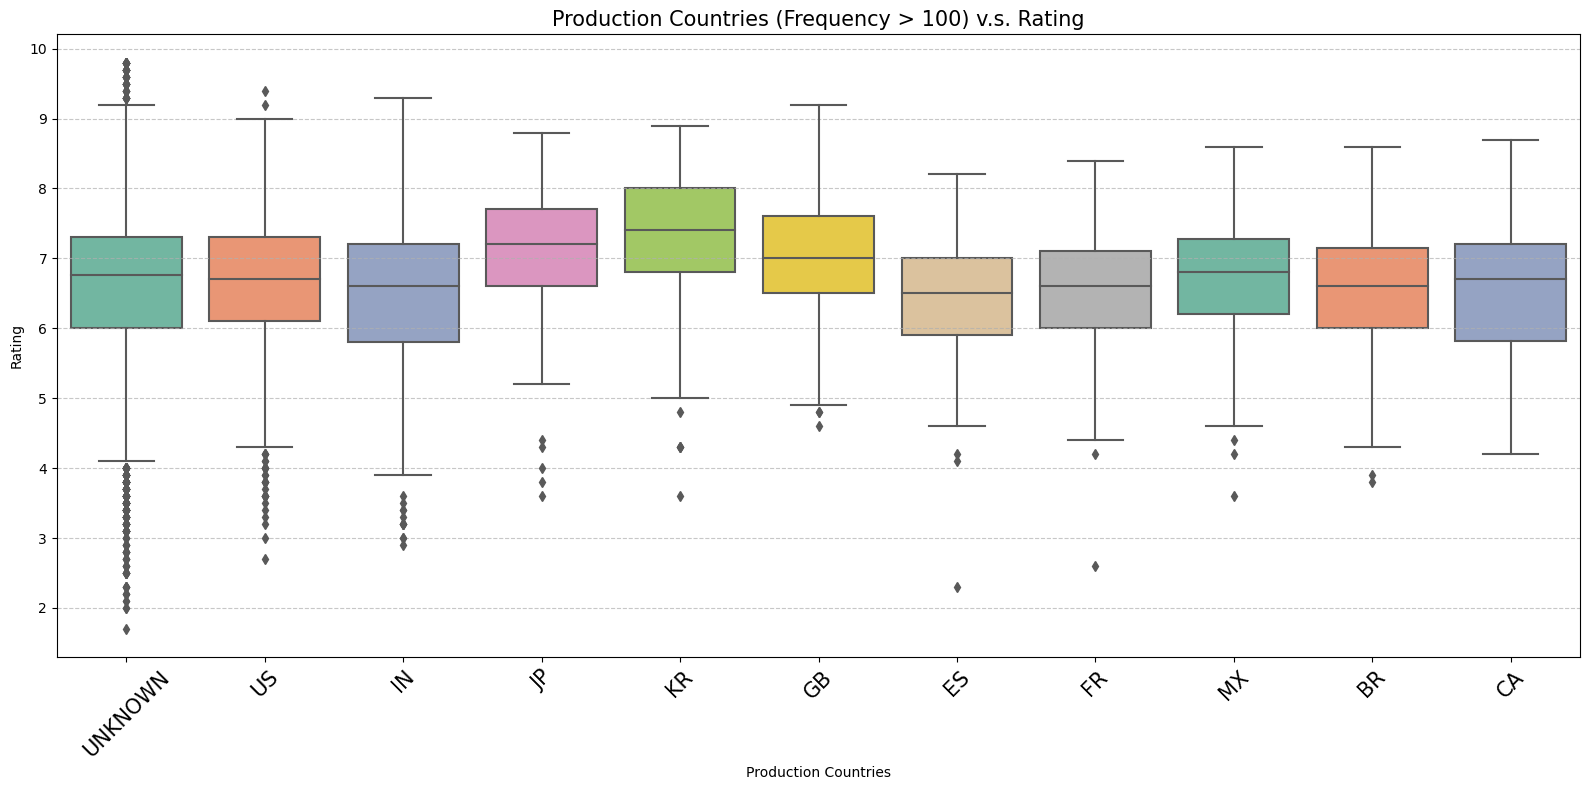

In [202]:
# Check if 'Production Countries' and 'rating' columns exist
if 'production_countries' in df.columns and 'rating' in df.columns:
    # Count the frequency of each country
    country_counts = df['production_countries'].value_counts()
    
    # Filter countries with frequency > 100
    valid_countries = country_counts[country_counts > 100].index
    filtered_df = df[df['production_countries'].isin(valid_countries)]
    
    plt.figure(figsize=(16, 8))
    
    # Box plot for the relationship between production countries and rating
    sns.boxplot(x='production_countries', y='rating', data=filtered_df, palette='Set2',
                order=valid_countries)
    
    plt.title('Production Countries (Frequency > 100) v.s. Rating',fontsize=15)
    plt.xlabel('Production Countries')
    plt.ylabel('Rating')
    plt.xticks(rotation=45, fontsize=15)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("The 'Production Countries' or 'rating' column does not exist in the dataset.")

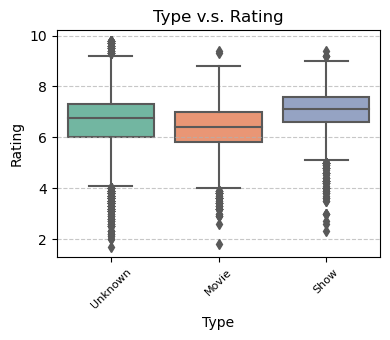

In [203]:
# Check if 'type' and 'rating' columns exist
if 'type' in df.columns and 'rating' in df.columns:
    plt.figure(figsize=(4,3.5 ))
    
    # Box plot for the relationship between type and rating
    sns.boxplot(x='type', y='rating', data=df, palette='Set2',
                order=df['type'].value_counts().index)
    
    plt.title('Type v.s. Rating')
    plt.xlabel('Type')
    plt.ylabel('Rating')
    plt.xticks(rotation=45, fontsize=8)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("The 'type' or 'rating' column does not exist in the dataset.")

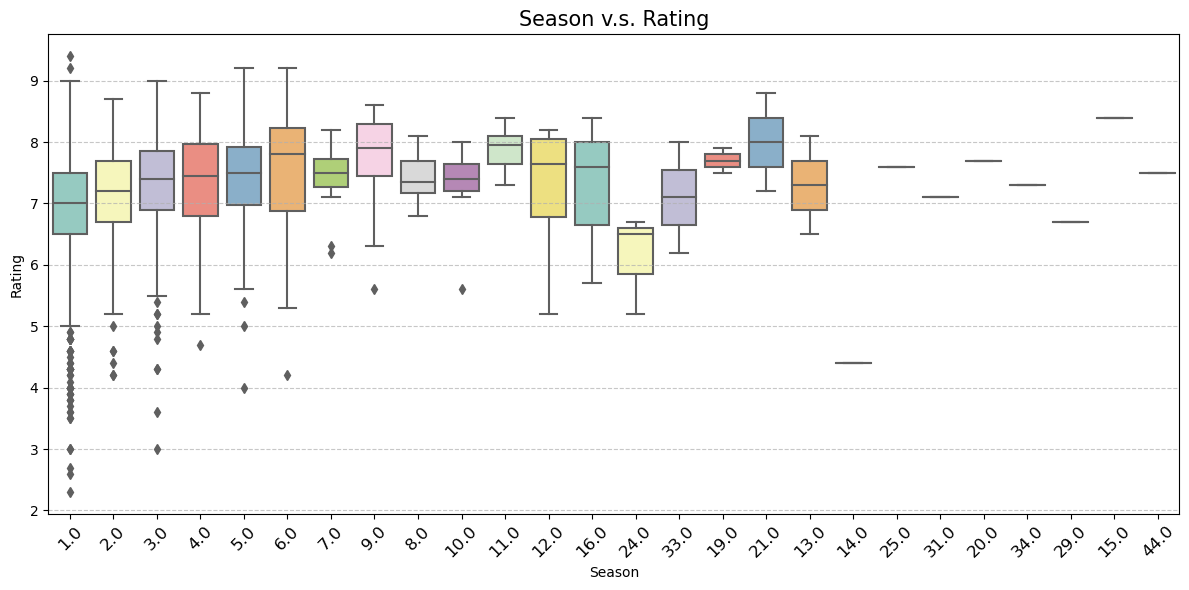

In [204]:
# Filter out rows where 'season' is 0.0
filtered_df = df[df['seasons'] != 0.0]

# Check if 'season' and 'rating' columns exist in the filtered dataset
if 'seasons' in filtered_df.columns and 'rating' in filtered_df.columns:
    plt.figure(figsize=(12, 6))
    
    # Create a box plot for the relationship between season and rating
    sns.boxplot(x='seasons', y='rating', data=filtered_df, palette='Set3', 
                order=filtered_df['seasons'].value_counts().index)
    
    plt.title('Season v.s. Rating',fontsize=15)
    plt.xlabel('Season')
    plt.ylabel('Rating')
    plt.xticks(rotation=45, fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("The 'season' or 'rating' column does nor exist")

## 3. Trend Analysis

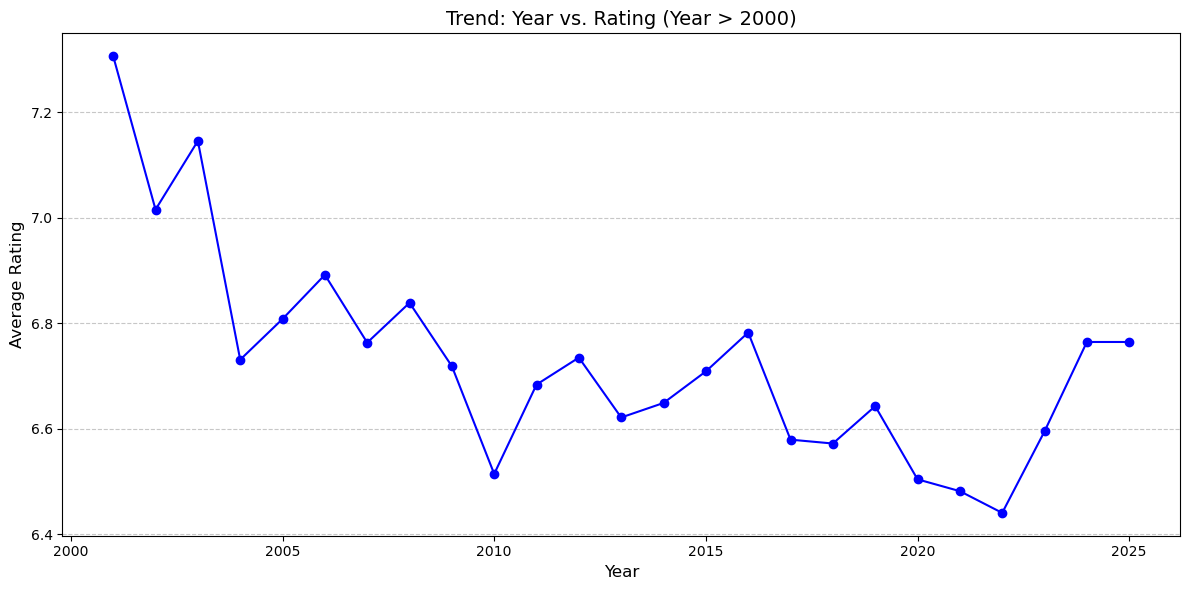

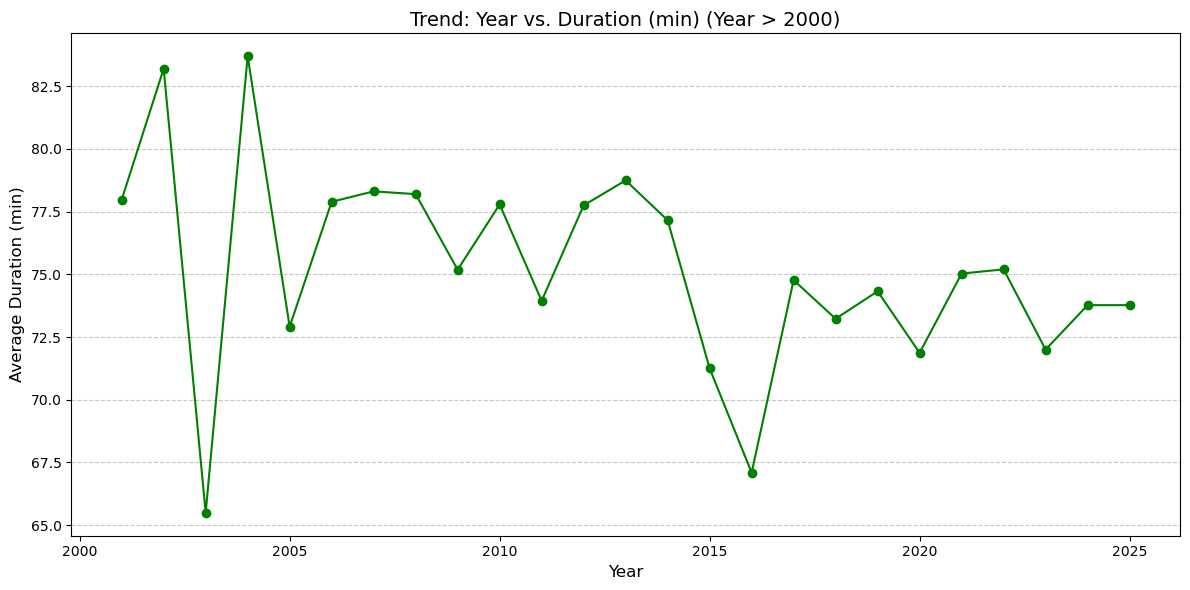

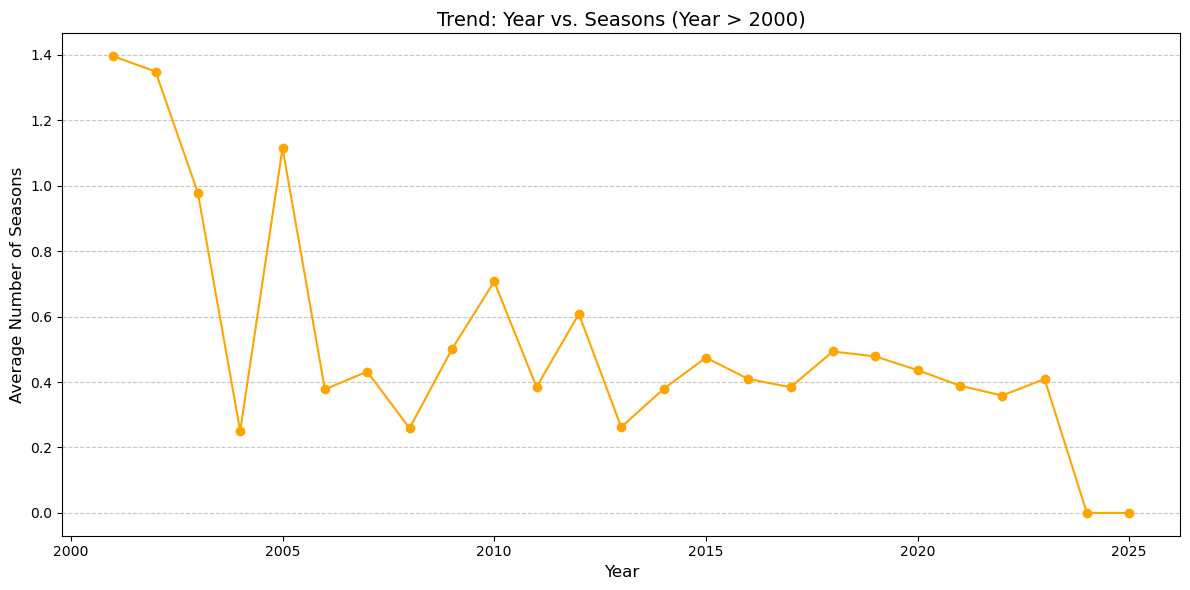

In [205]:
# Ensure 'year', 'rating', 'duration_min', and 'seasons' columns exist in the dataset
if {'year', 'rating', 'duration_min', 'seasons'}.issubset(df.columns):
    # Filter for years greater than 2000
    filtered_df = df[df['year'] > 2000]
    
    # Group by year and calculate the mean for each variable
    yearly_trends = filtered_df.groupby('year').agg({
        'rating': 'mean',
        'duration_min': 'mean',
        'seasons': 'mean'
    }).reset_index()

    # Chart 1: Year vs. Rating
    plt.figure(figsize=(12, 6))
    plt.plot(yearly_trends['year'], yearly_trends['rating'], marker='o', color='blue')
    plt.title('Trend: Year vs. Rating (Year > 2000)', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Average Rating', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Chart 2: Year vs. Duration (min)
    plt.figure(figsize=(12, 6))
    plt.plot(yearly_trends['year'], yearly_trends['duration_min'], marker='o', color='green')
    plt.title('Trend: Year vs. Duration (min) (Year > 2000)', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Average Duration (min)', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Chart 3: Year vs. Seasons
    plt.figure(figsize=(12, 6))
    plt.plot(yearly_trends['year'], yearly_trends['seasons'], marker='o', color='orange')
    plt.title('Trend: Year vs. Seasons (Year > 2000)', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Average Number of Seasons', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

else:
    print("The required columns ('year', 'rating', 'duration_min', 'seasons') are not in the dataset.")


## 4. Categorical Analysis

In [224]:
# Filter the countries with frequency > 100 if needed
country_counts = df['production_countries'].value_counts()
filtered_countries = country_counts[country_counts > 100].index

# Create a cross-tabulation
country_type_crosstab = pd.crosstab(
    df[df['production_countries'].isin(filtered_countries)]['production_countries'],
    df['type']
)
print(country_type_crosstab)  # Inspect the cross-tabulation table


type                  Movie  Show  Unknown
production_countries                      
BR                       61    42        0
CA                       56    46        0
ES                       88    81        0
FR                       57    60        0
GB                       80   151        0
IN                      560    57        0
JP                      102   175        0
KR                       46   212        0
MX                       62    52        0
UNKNOWN                   0     0     5894
US                     1100   838        0


In [225]:
# Remove rows where 'production_countries' or 'type' is 'Unknown'
filtered_df = df[(df['production_countries'] != 'Unknown') & (df['type'] != 'Unknown')]

# Filter the countries with frequency > 100 after removing 'Unknown'
country_counts = filtered_df['production_countries'].value_counts()
filtered_countries = country_counts[country_counts > 100].index

# Create a cross-tabulation with filtered data
country_type_crosstab = pd.crosstab(
    filtered_df[filtered_df['production_countries'].isin(filtered_countries)]['production_countries'],
    filtered_df['type']
)

# Inspect the cross-tabulation table
print(country_type_crosstab)

type                  Movie  Show
production_countries             
BR                       61    42
CA                       56    46
ES                       88    81
FR                       57    60
GB                       80   151
IN                      560    57
JP                      102   175
KR                       46   212
MX                       62    52
US                     1100   838


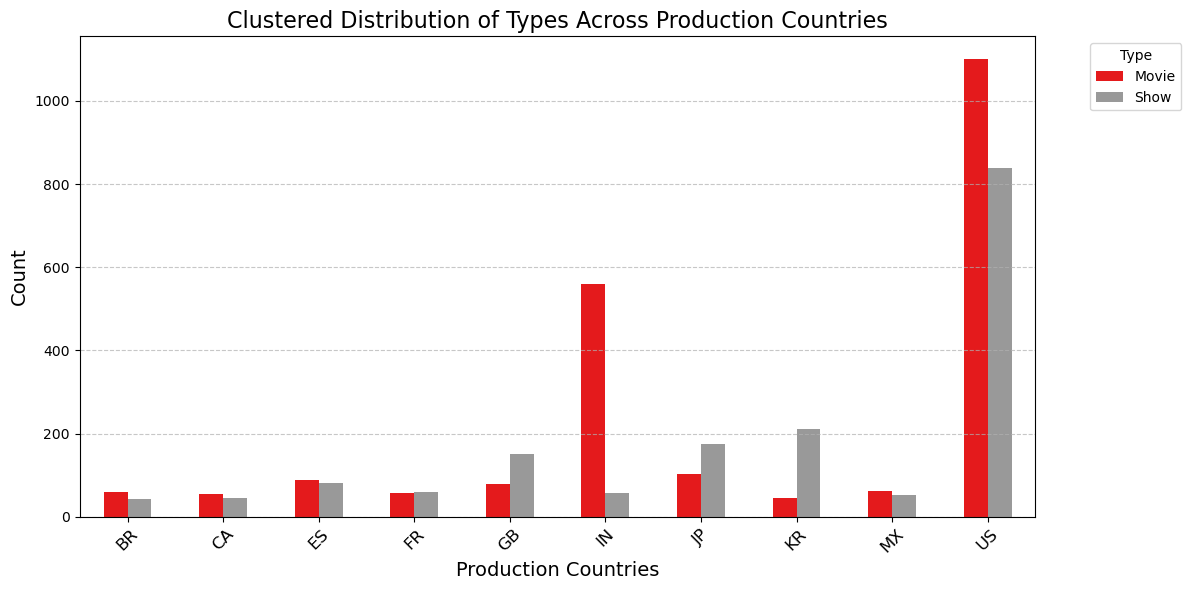

In [230]:
# Generate a clustered bar chart
country_type_crosstab.plot(kind='bar', stacked=False, figsize=(12, 6), colormap='Set1')

# Add chart titles and labels
plt.title('Clustered Distribution of Types Across Production Countries', fontsize=16)
plt.xlabel('Production Countries', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and display
plt.tight_layout()
plt.show()

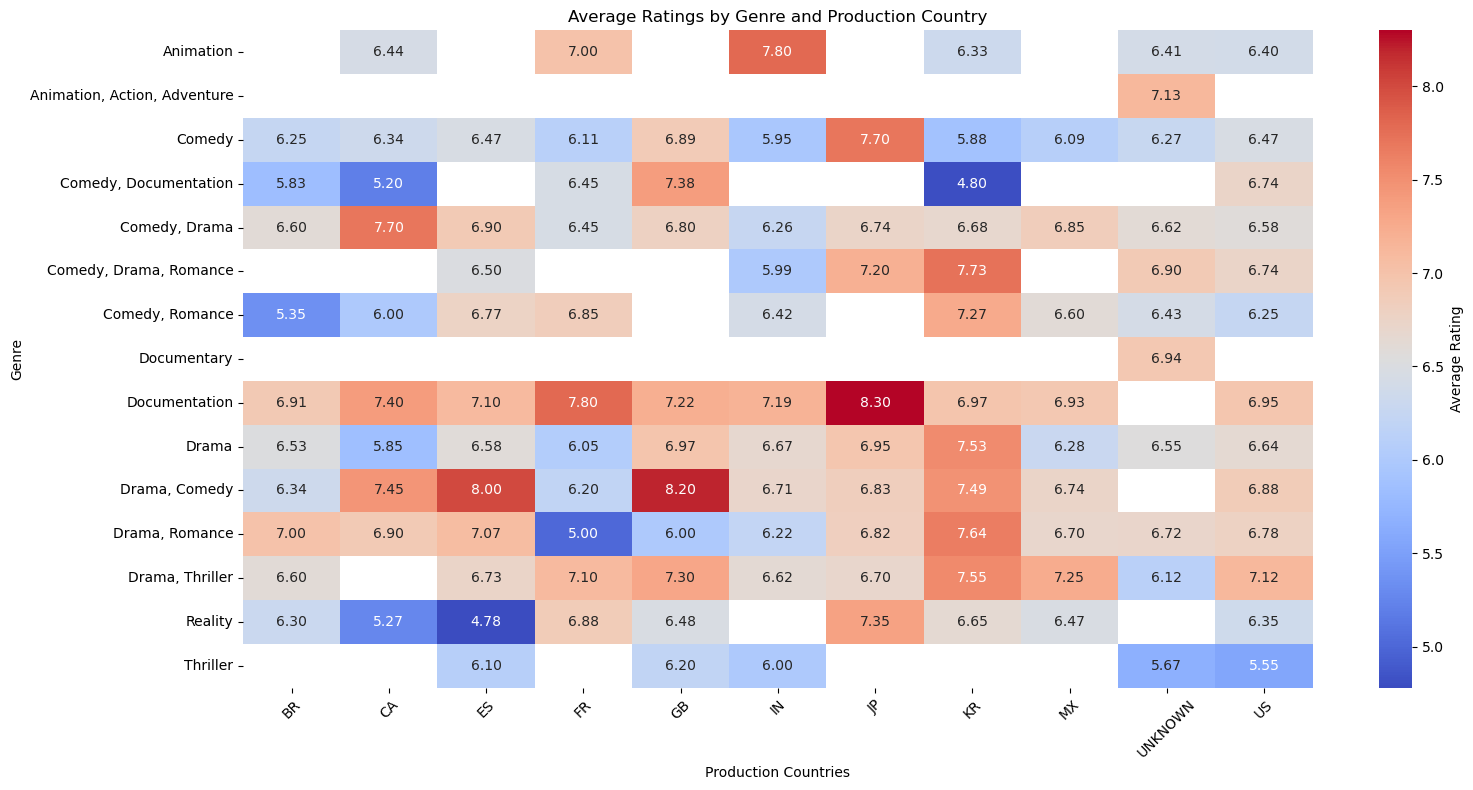

In [231]:
# Filter relevant data
filtered_countries = df['production_countries'].value_counts()
filtered_genres = df['genre'].value_counts()

filtered_countries = filtered_countries[filtered_countries > 100].index
filtered_genres = filtered_genres[filtered_genres > 100].index

filtered_data = df[
    (df['production_countries'].isin(filtered_countries)) &
    (df['genre'].isin(filtered_genres)) &
    (df['production_countries'] != 'Unknown') &
    (df['genre'] != 'Unknown')
]

# Group by genre and country, then calculate average rating
genre_country_rating = filtered_data.groupby(['genre', 'production_countries'])['rating'].mean().reset_index()

# Pivot table for the heatmap
pivot_table = genre_country_rating.pivot(
    index='genre',
    columns='production_countries',
    values='rating'
)

# Plotting the heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Average Rating'})
plt.title('Average Ratings by Genre and Production Country')
plt.xlabel('Production Countries')
plt.ylabel('Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()